In [1]:
library(tidyverse)
library(stringr)
library(lubridate)
#install.packages("ggmap")
library(ggmap)
#install.packages("dbscan")
library(dbscan)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'ggmap' was built under R version 4.0.3"
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.

Warning message:
"package 'dbscan' was built under R version 4.0.3"


In [11]:
### BEGIN SOLUTION
traffic <- read_csv("chicagotraffic2019.csv")
traffic = traffic %>% filter(!is.na(LATITUDE), !is.na(LONGITUDE), 
                             LATITUDE>41, LATITUDE<43, 
                             LONGITUDE>(-89), LONGITUDE<(-86))
traffic_injuries = traffic %>% filter((INJURIES_FATAL+INJURIES_INCAPACITATING) > 0, !is.na(INJURIES_FATAL))
traffic %>% head

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  POSTED_SPEED_LIMIT = col_double(),
  LANE_CNT = col_double(),
  STREET_NO = col_double(),
  BEAT_OF_OCCURRENCE = col_double(),
  NUM_UNITS = col_double(),
  INJURIES_TOTAL = col_double(),
  INJURIES_FATAL = col_double(),
  INJURIES_INCAPACITATING = col_double(),
  INJURIES_NON_INCAPACITATING = col_double(),
  INJURIES_REPORTED_NOT_EVIDENT = col_double(),
  INJURIES_NO_INDICATION = col_double(),
  INJURIES_UNKNOWN = col_double(),
  CRASH_HOUR = col_double(),
  CRASH_DAY_OF_WEEK = col_double(),
  CRASH_MONTH = col_double(),
  LATITUDE = col_double(),
  LONGITUDE = col_double()
)

See spec(...) for full column specifications.



X1
1  5
2  8
3 15
4 17
5 20
6 23
  CRASH_RECORD_ID                                                                                                                 
1 00e47f189660cd8ba1e85fc63061bf1d8465184393f134fb8251ed7896a4ba9ed7c984ab51a01f564d6f4133c6ef8493b1a369743a4a308d4392900a286e160f
2 0211e1f766f3940dfa87375661d25b716655e908c320cc46910e8fa5fb1f1e6a9d4f714d21e8e401ec9e0a12190b6cd9f6dbc97d32d0c0fc966a02ae516e782f
3 046c0f96fdf5f7384e026821bb23fdd56d610dce11247b4cf7072f4e0308cdf5865ee8f31d71792ef005d864c064aae933213ef5e4e87a9bb2247ffe0f56f245
4 0564e565ebda939c88d5da6d613ac5789b702cbff5b8744552f9930bd571995afb81a895dfd2bc8a23e6cca53f8fc6a9afbeb38591781281a3c37ceba5cbcbd5
5 06d11d0ac4bf97a43f93b78768b225c91ba0579939a4fc92ba3f426a1353607f52a8f8536eefb3a7a3e75f553d1e941841ce5b26890e986b06ad85a716fa3a2c
6 074f50577888fe85727b97fe0010aa708efe985ae1effdd2d03730c444e95bf795e54e0f7a2123d3c97b8fc80e7b822ce64fdcef7dd6f1b510a0856c7d8d669f
  RD_NO    CRASH_DATE             POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  
1 JC194776 03/21/2019 10:50:00 PM 30                 TRAFFIC SIGNAL          
2 JC301403 06/11/2019 08:40:00 AM 30                 TRAFFIC SIGNAL          
3 JC128226 01/24/2019 06:45:00 AM 30                 NO CONTROLS             
4 JC541936 12/10/2019 03:15:00 PM 20                 TRAFFIC SIGNAL          
5 JC263263 05/14/2019 07:30:00 PM 20                 PEDESTRIAN CROSSING SIGN
6 JC539018 12/08/2019 08:14:00 AM 35                 TRAFFIC SIGNAL          
  DEVICE_CONDITION     WEATHER_CONDITION LIGHTING_CONDITION    
1 FUNCTIONING PROPERLY CLEAR             DARKNESS, LIGHTED ROAD
2 FUNCTIONING PROPERLY CLEAR             DAYLIGHT              
3 NO CONTROLS          CLEAR             DARKNESS, LIGHTED ROAD
4 FUNCTIONING PROPERLY CLEAR             DAYLIGHT              
5 FUNCTIONING PROPERLY CLEAR             DAYLIGHT              
6 FUNCTIONING PROPERLY CLEAR             DAYLIGHT              
  FIRST_CRASH_TYPE         ... INJURIES_NON_INCAPACITATING
1 TURNING                  ... 0                          
2 REAR END                 ... 0                          
3 REAR END                 ... 0                          
4 PEDESTRIAN               ... 0                          
5 PEDESTRIAN               ... 1                          
6 SIDESWIPE SAME DIRECTION ... 0                          
  INJURIES_REPORTED_NOT_EVIDENT INJURIES_NO_INDICATION INJURIES_UNKNOWN
1 0                             2                      0               
2 0                             3                      0               
3 0                             2                      0               
4 0                             2                      0               
5 0                             2                      0               
6 0                             2                      0               
  CRASH_HOUR CRASH_DAY_OF_WEEK CRASH_MONTH LATITUDE LONGITUDE
1 22         5                  3          41.74180 -87.74095
2  8         3                  6          41.79478 -87.62383
3  6         5                  1          41.79478 -87.62383
4 15         3                 12          41.95420 -87.66919
5 19         3                  5          41.95068 -87.64378
6  8         1                 12          41.75872 -87.58559
  LOCATION                                
1 POINT (-87.740953581987 41.741803598989)
2 POINT (-87.623828038036 41.794778764028)
3 POINT (-87.623828038036 41.794778764028)
4 POINT (-87.669192620028 41.954196228965)
5 POINT (-87.64378474303 41.950676838996) 
6 POINT (-87.585590902031 41.758723759994)

In [5]:
print(c(left = min(traffic$LONGITUDE, na.rm=TRUE), 
                                  bottom = min(traffic$LATITUDE, na.rm=TRUE), 
                                  right = max(traffic$LONGITUDE, na.rm=TRUE), 
                                  top = max(traffic$LATITUDE, na.rm=TRUE)))

     left    bottom     right       top 
-87.93401  41.64467 -87.52459  42.02272 


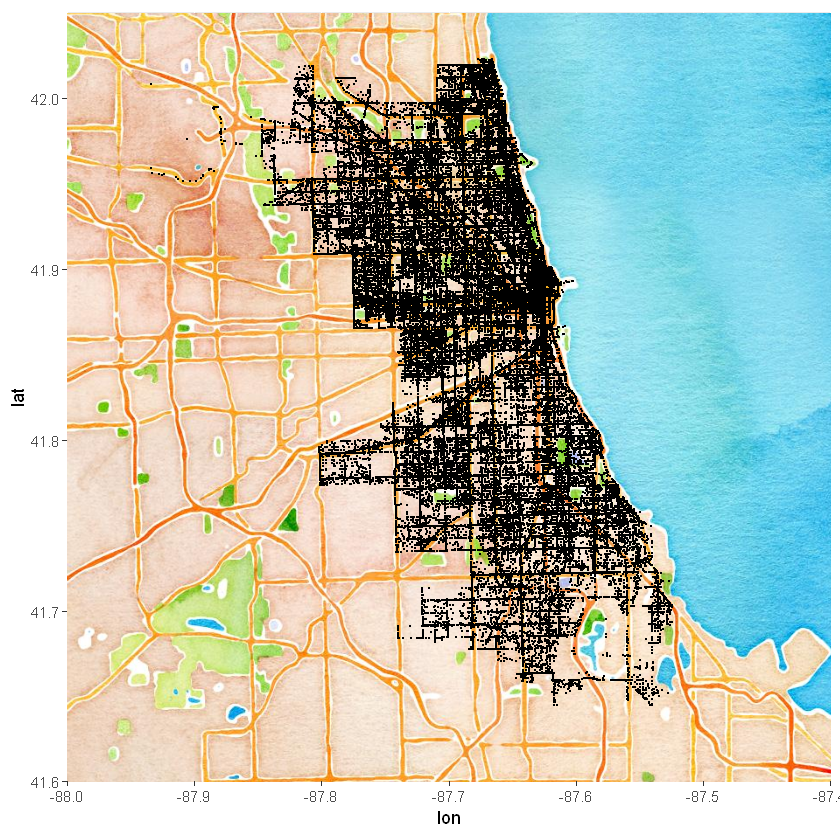

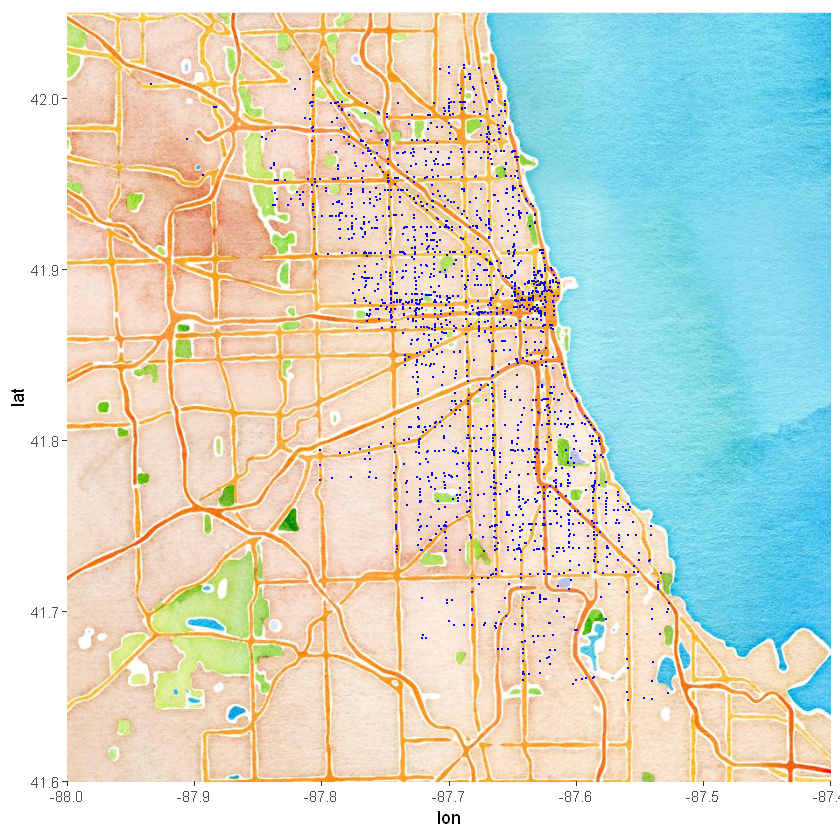

In [12]:
chicago <- get_stamenmap(bbox = c(left = -88, 
                                  bottom = 41.6, 
                                  right = -87.4, 
                                  top = 42.05), 
                         zoom = 11, maptype="watercolor")

ggmap(chicago) + geom_point(data=traffic, aes(x = LONGITUDE , y = LATITUDE), size=0.1, color="black")
ggmap(chicago) + geom_point(data=traffic_injuries, aes(x = LONGITUDE , y = LATITUDE), size=0.1, color="blue")

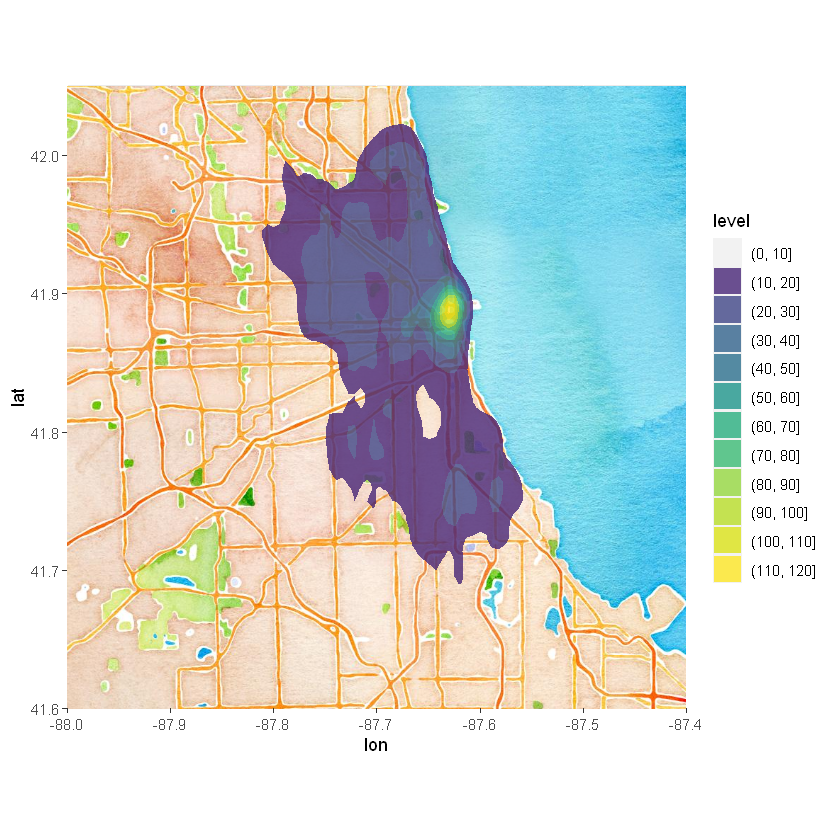

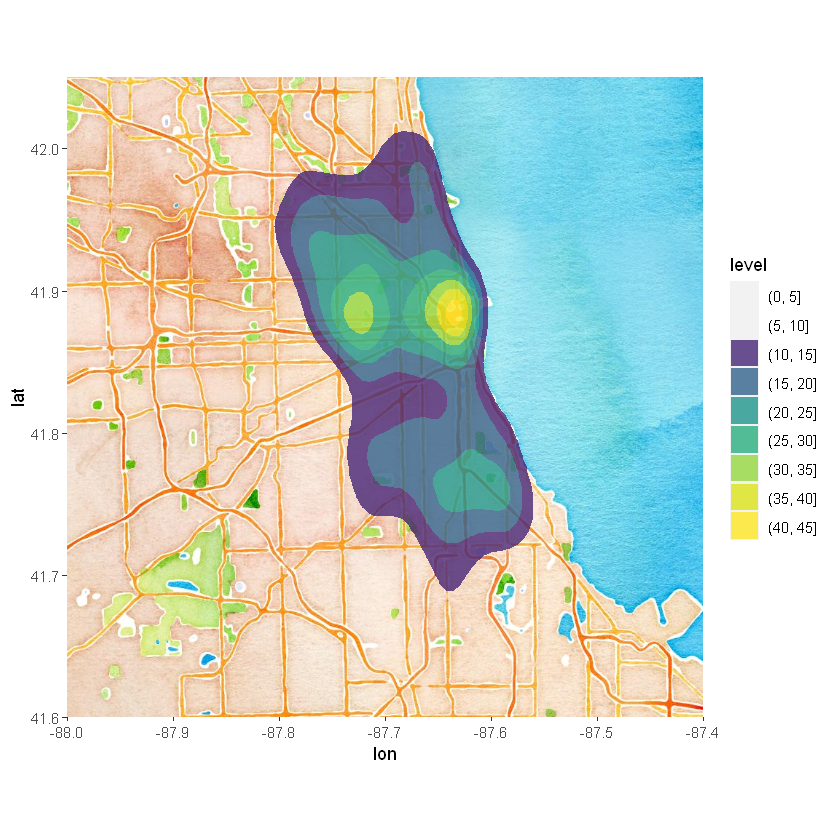

In [38]:
ggmap(chicago) + stat_density_2d_filled(data=traffic, aes(x = LONGITUDE , y = LATITUDE), alpha=0.8) +
  scale_fill_manual(values = c(NA, "#482677FF", "#404788FF", "#33638DFF",
                               "#2D708EFF", "#1F968BFF", 
                               "#29AF7FFF", "#3CBB75FF",  
                               "#95D840FF", "#B8DE29FF", "#DCE319FF", "#FDE725FF"))
ggmap(chicago) + stat_density_2d_filled(data=traffic_injuries, aes(x = LONGITUDE , y = LATITUDE), alpha=0.8) +
  scale_fill_manual(values = c(NA, NA, "#482677FF", "#33638DFF",
                               "#1F968BFF", 
                               "#29AF7FFF", 
                               "#95D840FF", "#DCE319FF", "#FDE725FF"))


Warning message:
"Removed 7239 rows containing non-finite values (stat_density2d_filled)."
Warning message:
"Removed 146 rows containing non-finite values (stat_density2d_filled)."


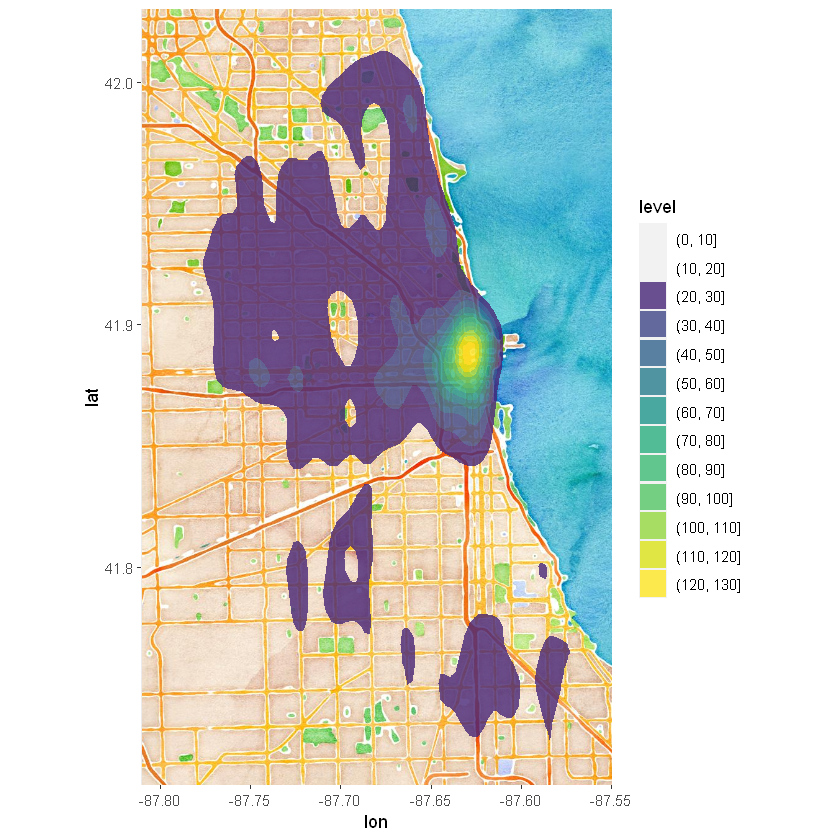

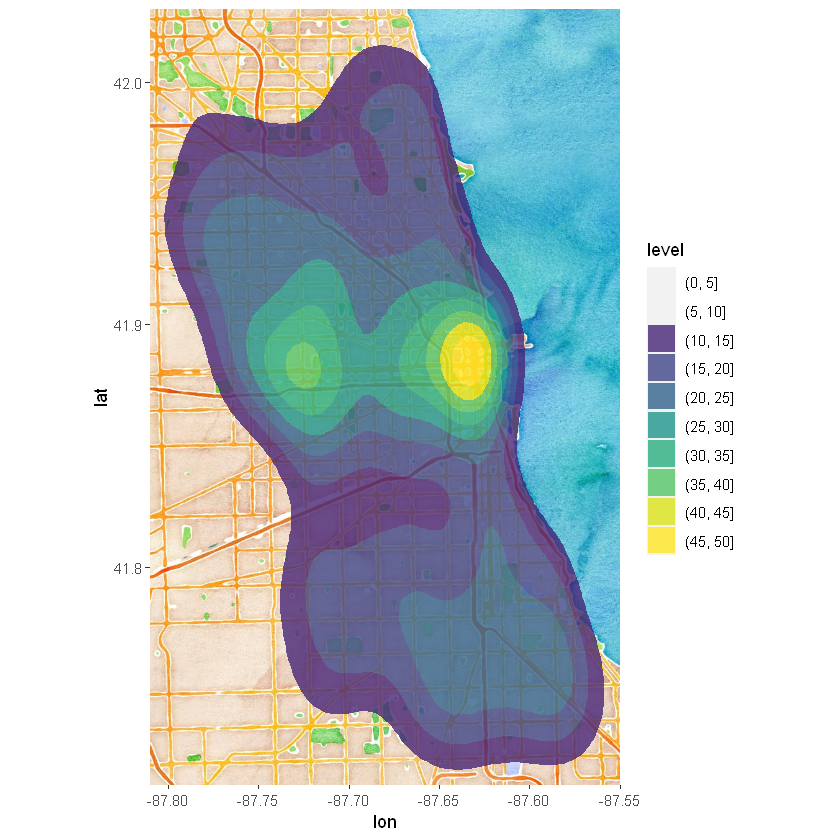

In [37]:
chicago_zoom <- get_stamenmap(bbox = c(left = -87.81, 
                                  bottom = 41.71, 
                                  right = -87.55, 
                                  top = 42.03), 
                         zoom = 12, maptype="watercolor")
ggmap(chicago_zoom) + stat_density_2d_filled(data=traffic, aes(x = LONGITUDE , y = LATITUDE), alpha=0.8) +
  scale_fill_manual(values = c(NA, NA, "#482677FF", "#404788FF", "#33638DFF",
                                "#287D8EFF", "#1F968BFF", 
                               "#29AF7FFF", "#3CBB75FF", "#55C667FF", 
                               "#95D840FF", "#DCE319FF", "#FDE725FF"))
ggmap(chicago_zoom) + stat_density_2d_filled(data=traffic_injuries, aes(x = LONGITUDE , y = LATITUDE), alpha=0.8) +
  scale_fill_manual(values = c(NA, NA, "#482677FF", "#404788FF", "#33638DFF",
                               "#1F968BFF", 
                               "#29AF7FFF", "#55C667FF", 
                               "#DCE319FF", "#FDE725FF"))

Warning message:
"Removed 100882 rows containing non-finite values (stat_density2d_filled)."
Warning message:
"Removed 1873 rows containing non-finite values (stat_density2d_filled)."


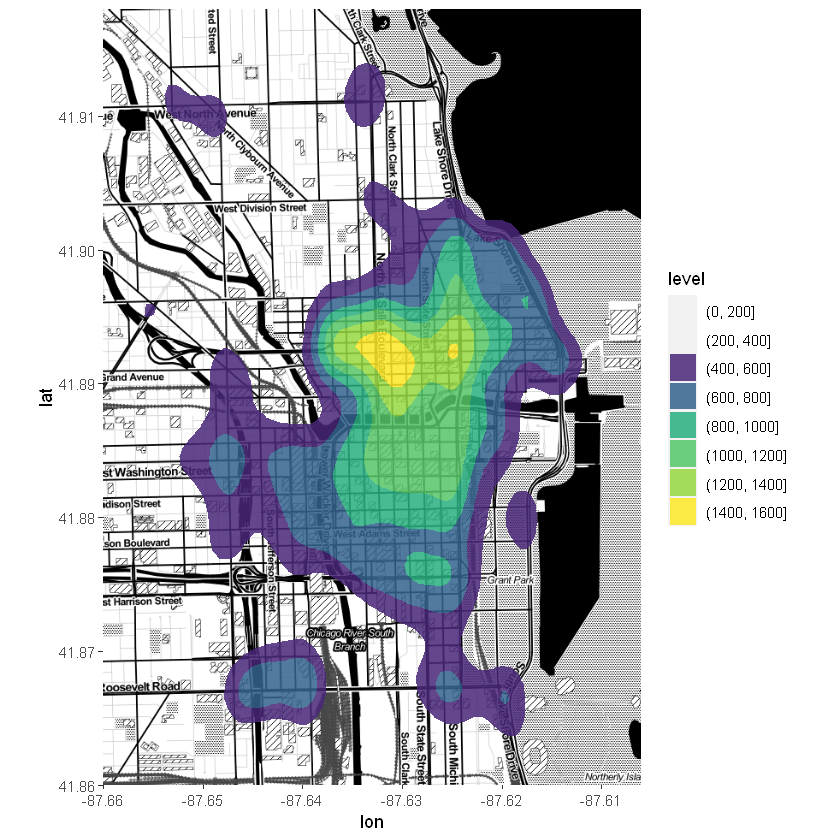

In [36]:
chicago_center <- get_stamenmap(bbox = c(left = -87.66, 
                                  bottom = 41.86, 
                                  right = -87.606, 
                                  top = 41.918), 
                         zoom = 14, maptype="toner")
ggmap(chicago_center) + stat_density_2d_filled(data=traffic, aes(x = LONGITUDE , y = LATITUDE), alpha=0.85) +
  scale_fill_manual(values = c(NA, NA, "#482677FF", "#33638DFF",
                               "#29AF7FFF", "#55C667FF", 
                               "#95D840FF", "#FDE725FF"))
ggmap(chicago_center) + stat_density_2d_filled(data=traffic_injuries, aes(x = LONGITUDE , y = LATITUDE), alpha=0.85) +
  scale_fill_manual(values = c(NA, NA, "#482677FF", "#33638DFF",
                              "#287D8EFF", "#1F968BFF", 
                               "#29AF7FFF",  "#55C667FF", 
                               "#95D840FF", "#B8DE29FF", "#DCE319FF", "#FDE725FF"))

In [ ]:
clusters = dbscan(traffic %>% filter(INJURIES_TOTAL>0) %>% select(LATITUDE, LONGITUDE), eps=0.1)